# Capstone Project 1 Machine Learning - Predicting NBA Player Salary and Position

### Contents

Introduction <br>
Predicting Player Salary from Statistical Performance<br>
<ul>Applying PCA <br>
Applying GridSearchCV<br>
Conclusions<br>
Takeaway for Players<br>
</ul><br>
Predicting Player Position from Statistical Performance<br>
<ul>Applying GridSearchCV<br>
Conclusions<br>
</ul>

### Introduction

In the previous portions of this project, we had established that statistically significant correlations between player salaries and several statistics, including VORP (Value Over Replacement Player), PER (Player Efficiency Rating), and 3P% (three-point percentage), among others. We also noticed smaller correlations between salary and a few other stats. Thus, for the first part of this project, we'll attempt to predict player salary through the best regression model. However, we're not particularly optimistic that we'll be able to develop a highly predictable model given that there are many other factors that help determine salary than just stats, as we'll discuss in more detail later.

We had also established that there is a statistically significant difference between the salaries of different player positions, with point guards historically making less money on average than every other position, with centers and power forwards typically making the most. However, there are other differences between positions as well. For example, point guards tend to have more assists on average than other positions, while centers and power forwards have a higher block rate. Shooting guards and small forwards may have more balanced stats overall, while also averaging higher points per game. As such, for our second analysis, we’ll attempt to predict player position from statistical performance.


We'll begin by importing our dataset and adjusting it as needed for our regression analysis.

In [2]:
# Import the appropriate libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sklearn
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [3]:
# Allow all columns to be displayed
pd.set_option('display.max_columns', 999)

In [4]:
# Read the dataset
nbadf = pd.read_csv('nba_final_dataset.csv')
nbadf.head(10)

,Unnamed: 0,Player,year_start,year_end,Year,Team,Salary,Pos,Age,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PPG,career_len
0,0,Alaa Abdelnaby,1991,1995,1991,Portland Trailblazers,395000,PF,22.0,43.0,0.0,290.0,13.1,0.499,0.000,0.379,10.4,23.4,17.0,5.8,0.7,2.5,14.0,22.1,0.0,0.5,0.5,0.079,-4.2,-0.7,-5.0,-0.2,55.0,116.0,0.474,0.0,0.0,0.000,55.0,116.0,0.474,0.474,25.0,44.0,0.568,27.0,62.0,89.0,12.0,4.0,12.0,22.0,39.0,135.0,3.1,4
1,1,Alaa Abdelnaby,1991,1995,1992,Portland Trailblazers,494000,PF,23.0,71.0,1.0,934.0,13.5,0.533,0.000,0.280,9.5,20.9,15.2,4.7,1.3,1.1,14.0,20.6,0.6,1.5,2.1,0.110,-3.0,-0.9,-3.9,-0.5,178.0,361.0,0.493,0.0,0.0,0.000,178.0,361.0,0.493,0.493,76.0,101.0,0.752,81.0,179.0,260.0,30.0,25.0,16.0,66.0,132.0,432.0,6.1,4
2,2,Alaa Abdelnaby,1991,1995,1993,Boston Celtics,500000,PF,24.0,75.0,52.0,1311.0,13.2,0.551,0.002,0.245,11.0,18.1,14.6,3.0,1.0,1.2,15.6,20.5,0.7,1.3,2.0,0.074,-2.3,-1.9,-4.2,-0.7,245.0,473.0,0.518,0.0,1.0,0.000,245.0,472.0,0.519,0.518,88.0,116.0,0.759,126.0,211.0,337.0,27.0,25.0,26.0,97.0,189.0,578.0,7.7,4
3,3,Alaa Abdelnaby,1991,1995,1994,Boston Celtics,805000,PF,25.0,13.0,0.0,159.0,9.2,0.485,0.000,0.455,8.5,24.2,16.3,2.7,0.6,1.2,20.5,22.6,-0.2,0.1,-0.1,-0.032,-7.1,-3.1,-10.2,-0.3,24.0,55.0,0.436,0.0,0.0,0.000,24.0,55.0,0.436,0.436,16.0,25.0,0.640,12.0,34.0,46.0,3.0,2.0,3.0,17.0,20.0,64.0,4.9,4
4,4,Alaa Abdelnaby,1991,1995,1995,Sacramento Kings,650000,PF,26.0,54.0,0.0,506.0,12.6,0.519,0.009,0.152,8.7,17.4,13.1,5.0,1.5,1.8,15.4,25.6,-0.4,0.7,0.3,0.027,-4.6,-1.7,-6.3,-0.6,118.0,231.0,0.511,0.0,2.0,0.000,118.0,229.0,0.515,0.511,20.0,35.0,0.571,37.0,77.0,114.0,13.0,15.0,12.0,45.0,104.0,256.0,4.7,4
5,5,Mahmoud Abdul-Rauf,1991,2001,1991,Denver Nuggets,1660000,PG,21.0,67.0,19.0,1505.0,12.2,0.448,0.099,0.097,1.9,6.0,3.8,19.2,1.5,0.1,9.5,27.2,-0.7,-0.3,-1.0,-0.031,-1.7,-4.4,-6.1,-1.6,417.0,1009.0,0.413,24.0,100.0,0.240,393.0,909.0,0.432,0.425,84.0,98.0,0.857,34.0,87.0,121.0,206.0,55.0,4.0,110.0,149.0,942.0,14.1,10
6,6,Mahmoud Abdul-Rauf,1991,2001,1992,Denver Nuggets,2008000,PG,22.0,81.0,11.0,1538.0,12.6,0.469,0.111,0.128,1.5,6.8,4.0,21.0,1.4,0.2,11.6,26.7,-0.2,0.8,0.6,0.018,-1.7,-3.5,-5.2,-1.3,356.0,845.0,0.421,31.0,94.0,0.330,325.0,751.0,0.433,0.440,94.0,108.0,0.870,22.0,92.0,114.0,192.0,44.0,4.0,117.0,130.0,837.0,10.3,10
7,7,Mahmoud Abdul-Rauf,1991,2001,1993,Denver Nuggets,2358000,PG,23.0,81.0,81.0,2710.0,15.6,0.515,0.140,0.165,2.0,6.8,4.4,20.8,1.5,0.2,11.0,25.5,3.0,2.2,5.1,0.091,1.1,-2.1,-1.0,0.7,633.0,1407.0,0.450,70.0,197.0,0.355,563.0,1210.0,0.465,0.475,217.0,232.0,0.935,51.0,174.0,225.0,344.0,84.0,8.0,187.0,179.0,1553.0,19.2,10
8,8,Mahmoud Abdul-Rauf,1991,2001,1994,Denver Nuggets,1825000,PG,24.0,80.0,78.0,2617.0,16.7,0.521,0.104,0.179,1.2,5.8,3.6,24.1,1.6,0.2,9.9,24.9,4.4,2.4,6.8,0.125,1.6,-2.1,-0.6,0.9,588.0,1279.0,0.460,42.0,133.0,0.316,546.0,1146.0,0.476,0.476,219.0,229.0,0.956,27.0,141.0,168.0,362.0,82.0,10.0,151.0,150.0,1437.0,18.0,10
9,9,Mahmoud Abdul-Rauf,1991,2001,1995,Denver Nuggets,2200000,PG,25.0,73.0,43.0,2082.0,17.8,0.543,0.214,0.155,1.9,5.9,3.9,23.0,1.9,0.3,10.0,25.8,3.8,1.3,5.0,0.115,2.2,-2.8,-0.6,0.7,472.0,1005.0,0.470,83.0,215.0,0.386,389.0,790.0,0.492,0.511,138.0,156.0,0.885,32.0,105.0,137.0,263.0,77.0,9.0,119.0,126.0,1165.0,16.0,10


### Predicting Player Salary from Statistical Output 

Before we start, it should be noted that in a previous attempt at predicting salary using linear regression resulted in 57% accuracy. It was the result of applying linear regression in combination with PCA. In that attempt, we didn't do any feature engineering, nor did we include any categorical features. We're not including the details in this notebook in order to allow for a more streamlined analysis that's solely focused on the steps that resulted in achieving our highest accuracy.

We're going to engage in a bit of feature engineering and add a couple of new columns to our dataset in hopes that they may improve our predictive abilities. The first is career_age, which just gives us how long a player has been in the league for a given year. Players who have more experience tend to get paid more. The second column is game_ratio, which is the ratio of games started to games played. Typically, the best paid players start the most games for their respective teams.

In [5]:
# Add new columns
nbadf['career_age'] = nbadf['Year'] - nbadf['year_start']
nbadf['game_ratio'] = nbadf['GS'] / nbadf['G']
nbadf.head(10)

,Unnamed: 0,Player,year_start,year_end,Year,Team,Salary,Pos,Age,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PPG,career_len,career_age,game_ratio
0,0,Alaa Abdelnaby,1991,1995,1991,Portland Trailblazers,395000,PF,22.0,43.0,0.0,290.0,13.1,0.499,0.000,0.379,10.4,23.4,17.0,5.8,0.7,2.5,14.0,22.1,0.0,0.5,0.5,0.079,-4.2,-0.7,-5.0,-0.2,55.0,116.0,0.474,0.0,0.0,0.000,55.0,116.0,0.474,0.474,25.0,44.0,0.568,27.0,62.0,89.0,12.0,4.0,12.0,22.0,39.0,135.0,3.1,4,0,0.000000
1,1,Alaa Abdelnaby,1991,1995,1992,Portland Trailblazers,494000,PF,23.0,71.0,1.0,934.0,13.5,0.533,0.000,0.280,9.5,20.9,15.2,4.7,1.3,1.1,14.0,20.6,0.6,1.5,2.1,0.110,-3.0,-0.9,-3.9,-0.5,178.0,361.0,0.493,0.0,0.0,0.000,178.0,361.0,0.493,0.493,76.0,101.0,0.752,81.0,179.0,260.0,30.0,25.0,16.0,66.0,132.0,432.0,6.1,4,1,0.014085
2,2,Alaa Abdelnaby,1991,1995,1993,Boston Celtics,500000,PF,24.0,75.0,52.0,1311.0,13.2,0.551,0.002,0.245,11.0,18.1,14.6,3.0,1.0,1.2,15.6,20.5,0.7,1.3,2.0,0.074,-2.3,-1.9,-4.2,-0.7,245.0,473.0,0.518,0.0,1.0,0.000,245.0,472.0,0.519,0.518,88.0,116.0,0.759,126.0,211.0,337.0,27.0,25.0,26.0,97.0,189.0,578.0,7.7,4,2,0.693333
3,3,Alaa Abdelnaby,1991,1995,1994,Boston Celtics,805000,PF,25.0,13.0,0.0,159.0,9.2,0.485,0.000,0.455,8.5,24.2,16.3,2.7,0.6,1.2,20.5,22.6,-0.2,0.1,-0.1,-0.032,-7.1,-3.1,-10.2,-0.3,24.0,55.0,0.436,0.0,0.0,0.000,24.0,55.0,0.436,0.436,16.0,25.0,0.640,12.0,34.0,46.0,3.0,2.0,3.0,17.0,20.0,64.0,4.9,4,3,0.000000
4,4,Alaa Abdelnaby,1991,1995,1995,Sacramento Kings,650000,PF,26.0,54.0,0.0,506.0,12.6,0.519,0.009,0.152,8.7,17.4,13.1,5.0,1.5,1.8,15.4,25.6,-0.4,0.7,0.3,0.027,-4.6,-1.7,-6.3,-0.6,118.0,231.0,0.511,0.0,2.0,0.000,118.0,229.0,0.515,0.511,20.0,35.0,0.571,37.0,77.0,114.0,13.0,15.0,12.0,45.0,104.0,256.0,4.7,4,4,0.000000
5,5,Mahmoud Abdul-Rauf,1991,2001,1991,Denver Nuggets,1660000,PG,21.0,67.0,19.0,1505.0,12.2,0.448,0.099,0.097,1.9,6.0,3.8,19.2,1.5,0.1,9.5,27.2,-0.7,-0.3,-1.0,-0.031,-1.7,-4.4,-6.1,-1.6,417.0,1009.0,0.413,24.0,100.0,0.240,393.0,909.0,0.432,0.425,84.0,98.0,0.857,34.0,87.0,121.0,206.0,55.0,4.0,110.0,149.0,942.0,14.1,10,0,0.283582
6,6,Mahmoud Abdul-Rauf,1991,2001,1992,Denver Nuggets,2008000,PG,22.0,81.0,11.0,1538.0,12.6,0.469,0.111,0.128,1.5,6.8,4.0,21.0,1.4,0.2,11.6,26.7,-0.2,0.8,0.6,0.018,-1.7,-3.5,-5.2,-1.3,356.0,845.0,0.421,31.0,94.0,0.330,325.0,751.0,0.433,0.440,94.0,108.0,0.870,22.0,92.0,114.0,192.0,44.0,4.0,117.0,130.0,837.0,10.3,10,1,0.135802
7,7,Mahmoud Abdul-Rauf,1991,2001,1993,Denver Nuggets,2358000,PG,23.0,81.0,81.0,2710.0,15.6,0.515,0.140,0.165,2.0,6.8,4.4,20.8,1.5,0.2,11.0,25.5,3.0,2.2,5.1,0.091,1.1,-2.1,-1.0,0.7,633.0,1407.0,0.450,70.0,197.0,0.355,563.0,1210.0,0.465,0.475,217.0,232.0,0.935,51.0,174.0,225.0,344.0,84.0,8.0,187.0,179.0,1553.0,19.2,10,2,1.000000
8,8,Mahmoud Abdul-Rauf,1991,2001,1994,Denver Nuggets,1825000,PG,24.0,80.0,78.0,2617.0,16.7,0.521,0.104,0.179,1.2,5.8,3.6,24.1,1.6,0.2,9.9,24.9,4.4,2.4,6.8,0.125,1.6,-2.1,-0.6,0.9,588.0,1279.0,0.460,42.0,133.0,0.316,546.0,1146.0,0.476,0.476,219.0,229.0,0.956,27.0,141.0,168.0,362.0,82.0,10.0,151.0,150.0,1437.0,18.0,10,3,0.975000
9,9,Mahmoud Abdul-Rauf,1991,2001,1995,Denver Nuggets,2200000,PG,25.0,73.0,43.0,2082.0,17.8,0.543,0.214,0.155,1.9,5.9,3.9,23.0,1.9,0.3,10.0,25.8,3.8,1.3,5.0,0.115,2.2,-2.8,-0.6,0.7,472.0,1005.0,0.470,83.0,215.0,0.386,389.0,790.0,0.492,0.511,138.0,156.0,0.885,32.0,105.0,137.0,263.0,77.0,9.0,119.0,126.0,1165.0,16.0,10,4,0.589041


In [6]:
# Define Pearson correlation coefficient
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0, 1]

In [7]:
# Compute correlation
print(pearson_r(nbadf['Salary'], nbadf['career_age']))
print(pearson_r(nbadf['Salary'], nbadf['game_ratio']))

0.4586652380968591
0.5163684370439005


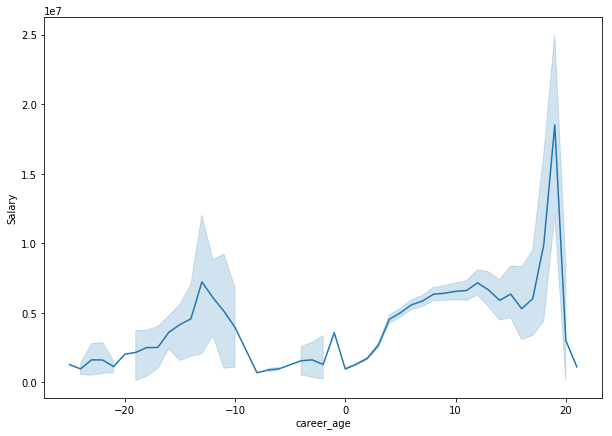

In [8]:
# Line plot of career_age vs Salary
plt.figure(figsize=(10, 7))
sns.lineplot(x='career_age', y='Salary', data=nbadf)

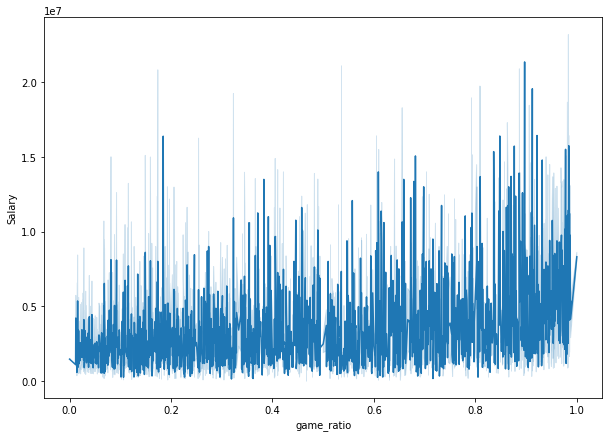

In [9]:
# Line plot of game_ratio and Salary
plt.figure(figsize=(10, 7))
sns.lineplot(x='game_ratio', y='Salary', data=nbadf)

Text(0.5, 1.0, 'Histogram of career_age')

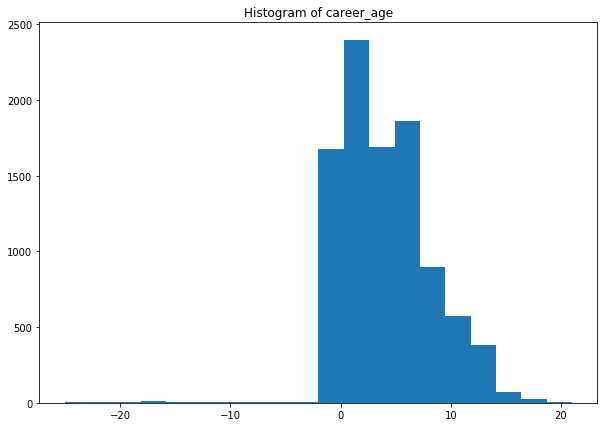

In [10]:
# Histogram of career_age
plt.figure(figsize=(10,7))
plt.hist(nbadf['career_age'], bins=20)
plt.title('Histogram of career_age')

Text(0.5, 1.0, 'Histogram of game_ratio')

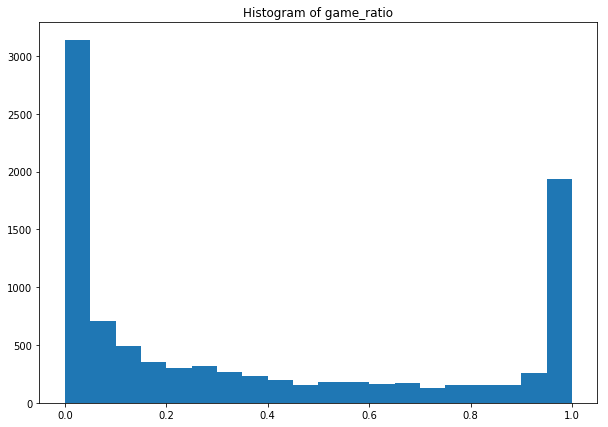

In [11]:
# Histogram of game_ratio
plt.figure(figsize=(10,7))
plt.hist(nbadf['game_ratio'], bins=20)
plt.title('Histogram of game_ratio')

We can determine whether these new features might be useful in several different ways, as demonstrated above. Their respective
correlations suggest some positive correlation with salary. The line plots show a general inclrease as salary increases, and the uneven distribution of the histograms suggests that it could make a difference to our model. Had the distributions been fairly even, the variables would have had no noticeable influence on our model.

In [12]:
# Drop features not relevant to our analysis
nbadf = nbadf.drop(['Unnamed: 0', 'Player', 'year_start', 'year_end'], axis=1)
nbadf.head()

,Year,Team,Salary,Pos,Age,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PPG,career_len,career_age,game_ratio
0,1991,Portland Trailblazers,395000,PF,22.0,43.0,0.0,290.0,13.1,0.499,0.000,0.379,10.4,23.4,17.0,5.8,0.7,2.5,14.0,22.1,0.0,0.5,0.5,0.079,-4.2,-0.7,-5.0,-0.2,55.0,116.0,0.474,0.0,0.0,0.0,55.0,116.0,0.474,0.474,25.0,44.0,0.568,27.0,62.0,89.0,12.0,4.0,12.0,22.0,39.0,135.0,3.1,4,0,0.000000
1,1992,Portland Trailblazers,494000,PF,23.0,71.0,1.0,934.0,13.5,0.533,0.000,0.280,9.5,20.9,15.2,4.7,1.3,1.1,14.0,20.6,0.6,1.5,2.1,0.110,-3.0,-0.9,-3.9,-0.5,178.0,361.0,0.493,0.0,0.0,0.0,178.0,361.0,0.493,0.493,76.0,101.0,0.752,81.0,179.0,260.0,30.0,25.0,16.0,66.0,132.0,432.0,6.1,4,1,0.014085
2,1993,Boston Celtics,500000,PF,24.0,75.0,52.0,1311.0,13.2,0.551,0.002,0.245,11.0,18.1,14.6,3.0,1.0,1.2,15.6,20.5,0.7,1.3,2.0,0.074,-2.3,-1.9,-4.2,-0.7,245.0,473.0,0.518,0.0,1.0,0.0,245.0,472.0,0.519,0.518,88.0,116.0,0.759,126.0,211.0,337.0,27.0,25.0,26.0,97.0,189.0,578.0,7.7,4,2,0.693333
3,1994,Boston Celtics,805000,PF,25.0,13.0,0.0,159.0,9.2,0.485,0.000,0.455,8.5,24.2,16.3,2.7,0.6,1.2,20.5,22.6,-0.2,0.1,-0.1,-0.032,-7.1,-3.1,-10.2,-0.3,24.0,55.0,0.436,0.0,0.0,0.0,24.0,55.0,0.436,0.436,16.0,25.0,0.640,12.0,34.0,46.0,3.0,2.0,3.0,17.0,20.0,64.0,4.9,4,3,0.000000
4,1995,Sacramento Kings,650000,PF,26.0,54.0,0.0,506.0,12.6,0.519,0.009,0.152,8.7,17.4,13.1,5.0,1.5,1.8,15.4,25.6,-0.4,0.7,0.3,0.027,-4.6,-1.7,-6.3,-0.6,118.0,231.0,0.511,0.0,2.0,0.0,118.0,229.0,0.515,0.511,20.0,35.0,0.571,37.0,77.0,114.0,13.0,15.0,12.0,45.0,104.0,256.0,4.7,4,4,0.000000


In [13]:
# Create a new dataset without Salary, since that's what we'll be trying to predict
nbadfnosal = nbadf.drop(['Salary'], axis=1)

In [14]:
nbadf.head()

,Year,Team,Salary,Pos,Age,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PPG,career_len,career_age,game_ratio
0,1991,Portland Trailblazers,395000,PF,22.0,43.0,0.0,290.0,13.1,0.499,0.000,0.379,10.4,23.4,17.0,5.8,0.7,2.5,14.0,22.1,0.0,0.5,0.5,0.079,-4.2,-0.7,-5.0,-0.2,55.0,116.0,0.474,0.0,0.0,0.0,55.0,116.0,0.474,0.474,25.0,44.0,0.568,27.0,62.0,89.0,12.0,4.0,12.0,22.0,39.0,135.0,3.1,4,0,0.000000
1,1992,Portland Trailblazers,494000,PF,23.0,71.0,1.0,934.0,13.5,0.533,0.000,0.280,9.5,20.9,15.2,4.7,1.3,1.1,14.0,20.6,0.6,1.5,2.1,0.110,-3.0,-0.9,-3.9,-0.5,178.0,361.0,0.493,0.0,0.0,0.0,178.0,361.0,0.493,0.493,76.0,101.0,0.752,81.0,179.0,260.0,30.0,25.0,16.0,66.0,132.0,432.0,6.1,4,1,0.014085
2,1993,Boston Celtics,500000,PF,24.0,75.0,52.0,1311.0,13.2,0.551,0.002,0.245,11.0,18.1,14.6,3.0,1.0,1.2,15.6,20.5,0.7,1.3,2.0,0.074,-2.3,-1.9,-4.2,-0.7,245.0,473.0,0.518,0.0,1.0,0.0,245.0,472.0,0.519,0.518,88.0,116.0,0.759,126.0,211.0,337.0,27.0,25.0,26.0,97.0,189.0,578.0,7.7,4,2,0.693333
3,1994,Boston Celtics,805000,PF,25.0,13.0,0.0,159.0,9.2,0.485,0.000,0.455,8.5,24.2,16.3,2.7,0.6,1.2,20.5,22.6,-0.2,0.1,-0.1,-0.032,-7.1,-3.1,-10.2,-0.3,24.0,55.0,0.436,0.0,0.0,0.0,24.0,55.0,0.436,0.436,16.0,25.0,0.640,12.0,34.0,46.0,3.0,2.0,3.0,17.0,20.0,64.0,4.9,4,3,0.000000
4,1995,Sacramento Kings,650000,PF,26.0,54.0,0.0,506.0,12.6,0.519,0.009,0.152,8.7,17.4,13.1,5.0,1.5,1.8,15.4,25.6,-0.4,0.7,0.3,0.027,-4.6,-1.7,-6.3,-0.6,118.0,231.0,0.511,0.0,2.0,0.0,118.0,229.0,0.515,0.511,20.0,35.0,0.571,37.0,77.0,114.0,13.0,15.0,12.0,45.0,104.0,256.0,4.7,4,4,0.000000


We have two categorical features that we would like to include in our analysis - Team and Pos. However, in order to include them, we need to innumerate them using OneHotEncoder and ColumnTransformer. We'll do that below. We'll also pass our numeric variables through ColumnTransformer so that we can concatenate our categorical and numeric values.

In [15]:
# Import the train/test split and split the data
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
Xtrainl, Xtestl, ytrainl, ytestl = train_test_split(nbadfnosal, nbadf['Salary'], random_state=5)

In [16]:
# Import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)

In [17]:
# Import ColumnTransformer
from sklearn.compose import ColumnTransformer

In [18]:
# For loop to create a list of all column values
numeric_columns = []
for col in nbadfnosal.columns:
    numeric_columns.append(col)

numeric_columns    

['Year',
 'Team',
 'Pos',
 'Age',
 'G',
 'GS',
 'MP',
 'PER',
 'TS%',
 '3PAr',
 'FTr',
 'ORB%',
 'DRB%',
 'TRB%',
 'AST%',
 'STL%',
 'BLK%',
 'TOV%',
 'USG%',
 'OWS',
 'DWS',
 'WS',
 'WS/48',
 'OBPM',
 'DBPM',
 'BPM',
 'VORP',
 'FG',
 'FGA',
 'FG%',
 '3P',
 '3PA',
 '3P%',
 '2P',
 '2PA',
 '2P%',
 'eFG%',
 'FT',
 'FTA',
 'FT%',
 'ORB',
 'DRB',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS',
 'PPG',
 'career_len',
 'career_age',
 'game_ratio']

In [21]:
# Eliminate the two categorical values; we'll apply ColumnTransformer on them seperately
for i in numeric_columns:
    if i == 'Team' or i == 'Pos':
        numeric_columns.remove(i)       

In [22]:
# Final list of numeric columns
numeric_columns

['Year',
 'Age',
 'G',
 'GS',
 'MP',
 'PER',
 'TS%',
 '3PAr',
 'FTr',
 'ORB%',
 'DRB%',
 'TRB%',
 'AST%',
 'STL%',
 'BLK%',
 'TOV%',
 'USG%',
 'OWS',
 'DWS',
 'WS',
 'WS/48',
 'OBPM',
 'DBPM',
 'BPM',
 'VORP',
 'FG',
 'FGA',
 'FG%',
 '3P',
 '3PA',
 '3P%',
 '2P',
 '2PA',
 '2P%',
 'eFG%',
 'FT',
 'FTA',
 'FT%',
 'ORB',
 'DRB',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS',
 'PPG',
 'career_len',
 'career_age',
 'game_ratio']

Now that we have our list of numeric columns, we're going to apply ColumnTransformer to our numeric and categorical 
features separately. We'll then develop a pipeline that concatenates both sets and applies linear regression to training data in order to predict test data. We'll use a similar pipeline for several other  regression models to determine which seem the most promising. We'll then select one to tune further in hopes of greater predictablilty. 

In [25]:
# Import several sklearn modules and create a pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression

np.random.seed(0)

# Alternatively X and y can be obtained directly from the frame attribute:
X = nbadfnosal
y = nbadf['Salary']

# We create the preprocessing pipelines for both numeric and categorical data.
numeric_features = numeric_columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['Team', 'Pos']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', LinearRegression())])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf.fit(X_train, y_train)
print("training score: %.3f" % clf.score(X_train, y_train))
print("model score: %.3f" % clf.score(X_test, y_test))

training score: 0.595
model score: 0.554


In [26]:
# Apply RandomForestRegression
from sklearn.ensemble import RandomForestRegressor
ran = Pipeline(steps=[('preprocessor', preprocessor), ('ranregressor', RandomForestRegressor(max_depth=15, random_state=9))])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

ran.fit(X_train, y_train)
print("training score: %.3f" % ran.score(X_train, y_train))
print("model score: %.3f" % ran.score(X_test, y_test))

C:\Users\K\Anaconda373\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


training score: 0.925
model score: 0.659


In [27]:
# Apply Lasso
from sklearn.linear_model import Lasso
las = Pipeline(steps=[('preprocessor', preprocessor), ('lasregressor', Lasso(random_state=9))])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

las.fit(X_train, y_train)
print("training score: %.3f" % las.score(X_train, y_train))
print("model score: %.3f" % las.score(X_test, y_test))

training score: 0.587
model score: 0.588


C:\Users\K\Anaconda373\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [28]:
# Apply Ridge
from sklearn.linear_model import Ridge
rid = Pipeline(steps=[('preprocessor', preprocessor), ('ridregressor', Ridge(random_state=9))])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rid.fit(X_train, y_train)
print("training score: %.3f" % rid.score(X_train, y_train))
print("model score: %.3f" % rid.score(X_test, y_test))

training score: 0.593
model score: 0.568


In [31]:
# Apply SVR
from sklearn.svm import SVR
svr = Pipeline(steps=[('preprocessor', preprocessor), ('svregressor', SVR(gamma='auto'))])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

svr.fit(X_train, y_train)
print("training score: %.3f" % svr.score(X_train, y_train))
print("model score: %.3f" % svr.score(X_test, y_test))

training score: -0.160
model score: -0.164


Based on the above initial analysis, it appears that random forest regression offers greater predictabilty than the other models, so we'll see if we can tune it further for better prediction power. However, the high training accuracy contrasts sharply with the low test accuracy, suggesting that the model is overfit. So, we'll also have to work on reducing overfitting. We'll start with a PCA analysis to reduce dimensionality.

#### Applying PCA

In [32]:
# Fit ColumnTransformer 
nbacoltran = preprocessor.fit_transform(nbadf)

In [33]:
# MinMaxScaler to fit the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=[0,1])
nbarescaled = scaler.fit_transform(nbacoltran)

In [34]:
# Import and fit PCA
from sklearn.decomposition import PCA
pcanba = PCA().fit(nbarescaled)

In [35]:
# Cumulative sum of the explained variance
pcapca = pcanba.explained_variance_ratio_.cumsum()

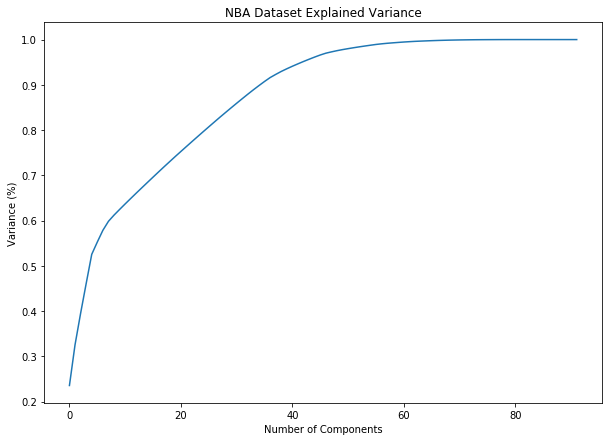

In [36]:
#Plotting the Cumulative Summation of the Explained Variance
plt.figure(figsize=(10,7))
plt.plot(pcanba.explained_variance_ratio_.cumsum())
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('NBA Dataset Explained Variance')
plt.show()

Due to our ColumnTransformer pipeline, we have double the number of components than those in our original dataset.
However, our PCA analysis suggests that we can explain close to 100% of the variance with around 70 components. We'll also try some trial and error with the number of estimators, the max depth, and the minimum number of leaves for the random forest regressor.

In [37]:
# Create a pipeline with PCA, a scaler, column transformer, and random forest regressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score

pipe_rf_pca = Pipeline([ ('preprocessor', preprocessor), ('scaler', MinMaxScaler()),
			('pca', PCA(n_components=70)), 
			('ranregressor', RandomForestRegressor(n_estimators=50, max_depth=15, min_samples_leaf=10, random_state=9))])

pipe_rf_pca.fit(X_train, y_train)
print("training score: %.3f" % pipe_rf_pca.score(X_train, y_train))
print("model score: %.3f" % pipe_rf_pca.score(X_test, y_test))
pred = pipe_rf_pca.predict(X_test)
print(mean_squared_error(y_test, pred))
print(r2_score(y_test, pred))

training score: 0.809
model score: 0.595
6926138380257.826
0.5951948422567463


In [38]:
# Run a similar model as above, but without PCA and the scaler
ran1 = Pipeline(steps=[('preprocessor', preprocessor), ('ranregressor', RandomForestRegressor(n_estimators=50, max_depth=15, min_samples_leaf=10, random_state=9))])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

ran1.fit(X_train, y_train)
print("training score: %.3f" % ran1.score(X_train, y_train))
print("model score: %.3f" % ran1.score(X_test, y_test))

training score: 0.832
model score: 0.677


After tuning the hyperparameters, it appears that PCA and MinMaxScalar are hurting our accuracy. Both models reduce the amount of overfitting. However, the test scores are more accurate without PCA and MinMaxScalar. Yet, the tuning of the random forest regressor was done through trial and error. We'll use GridsearchCV to find more optimal values for the parameters.

#### Applying GridSearchCV

In [39]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV 

In [332]:
# Number of trees in random forest
n_estimators = [40, 50, 60]
# Maximum number of levels in tree
max_depth = [5, 10, 15]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 4, 6]
# Minimum number of samples required at each leaf node
min_samples_leaf = [8, 10, 12]
# Create the grid
grid_param2 = {'ranregressor__n_estimators': n_estimators,
              #'ranregressor__max_depth': max_depth,
              'ranregressor__min_samples_split': min_samples_split,
              'ranregressor__min_samples_leaf': min_samples_leaf}
print(grid_param2)

{'ranregressor__n_estimators': [40, 50, 60], 'ranregressor__min_samples_split': [2, 4, 6], 'ranregressor__min_samples_leaf': [8, 10, 12]}


In [333]:
# Create a Pipeline and use GridSearch to find the best parameters for our model
ran2 = Pipeline(steps=[('preprocessor', preprocessor), ('ranregressor', RandomForestRegressor())])

gridcv = GridSearchCV(estimator=ran2, param_grid=grid_param2, cv=5).fit(X_train, y_train)
print(gridcv.best_params_)

{'ranregressor__min_samples_leaf': 10, 'ranregressor__min_samples_split': 6, 'ranregressor__n_estimators': 50}


GridSearhCV suggests that we use the following parameters: {'ranregressor__min_samples_leaf': 10, 'ranregressor__min_samples_split': 6, 'ranregressor__n_estimators': 50}. These are similar to the parameters that we had above. However, gridsearch allowed us to also add a value for the minimum samples split. 

In [40]:
# Create a pipeline with new parameters and fit it to our data 
ran3 = Pipeline(steps=[('preprocessor', preprocessor), ('ranregressor', RandomForestRegressor(n_estimators=50, max_depth=15, min_samples_leaf=10, min_samples_split=6, random_state=9))])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

ran3.fit(X_train, y_train)
print("training score: %.3f" % ran3.score(X_train, y_train))
print("model score: %.3f" % ran3.score(X_test, y_test))

training score: 0.828
model score: 0.714


Given where we initially started at 57%, this 14 percentile point increase through the use of feature engineering and parameter fitting is significant. And yet, 71% is still not accurate enough to predict salaries consistently.

#### Conclusions

While we do get an increase in accuracy, this is still well below the ability to predict a salary accurately. There may be several reasons why we may never achieve high accuracy values given this dataset:

1. Recall from our previous work on this dataset that there is some bias. Namely, the dataset only includes players whose careers began in 1991 and after. So, many players who played in their early '90s but began their careers in the '80s were not included. This may slightly decrease our accuracy. However, this is probably the least likely reason for low accuracy.


2. Stats haven't increased at the same rate as salaries. In other words, while average salaries have increased substantially since the 1990s, many statistical values have not increased at the same rate. As we saw in a heatmap in a previous portion of this project, most correlations with salary were fairly low, rarely being greater than 60%. As such the model would have a difficult time projecting stats to salary values because players are being paid substantially higher wages for only slightly better statistical output.


3. One may suggest that another possible reason may be inflation. The inflation rate in the U.S. has varied throughout the years, but salaries in the 1990s would be larger if the inflation rate were taken into consideration. However, this approach still may not make our model very accurate. In the U.S., salaries have never kept pace with the rate of inflation. Even as inflation has increased, salaries have remained largely stagnant. Yet, there's little reason to believe that NBA salaries have much to do with inflation at all. As suggested below, the NBA often lives inside it's own little bubble where salaries get dictated by a number of factors not necessarily related to current economic climates.


4. There may also be a variety of factors related to players being underpaid or overpaid. For example, teams competing with one another over particular players in a given situation drive up the price of a player in such a way that such an increase may not be warranted outside of that context (such as playoff contenders needing to pick up last minute help, a team looking to rebuild during the offseason with very few strong free agents to choose from, etc). There are also considerations of labor union influenced league minimums, which have lead to average salary increases, regardless of player skill. Player popularity may also play a role as teams may be eager to cash in on advertising and ticket sales from a popular player, often resulting in a player getting paid more that his statistical output may warrant. Additionally, as the NBA has become a global brand over the last decade, more money has flowed into the organization, resulting in much of that money being distributed to players.

All of these various factors make it difficult to predict salary simply from stats. In fact, without datasets that took into account many of the factors mentioned above, we likely couldn't ever make an accurate model (anything greater than 95% accuracy) for this particular question. 


#### Takeaway for Players

While our model was not able to accurately predict player salaries, this project is still useful for players to consider when evaluating their financial worth in the NBA. What our model did allow us to determine is that statistical performance is not the sole factor  in determining a player’s salary. As mentioned above, there are a whole host of factors that may not directly be connected to statistical output. Having that insight can prove useful for players. They, for example, can learn to better market themselves. Even if they happen to have mediocre stats, by marketing themselves properly, they can make themselves more financially lucrative to a team. This could be in the form of advertising deals, both for the team and player. The increased popularity can lead to increased ticket sales and, of course, a greater salary for that player than his on-court performance warrants.    

### Predicting Player Position from Statistical Output 

Just to note, the main goal of our machine learning analysis was to determine how well we could predict salary, which was demonstrated above. This next section on predicting player position is an interesting side analysis, but we won’t go into as much depth as with the salary analysis due to time constraints.  

There are five different positions in the NBA - center, power forward, small forward, shooting guard, and point guard. There are noticeable differences between positions. For instance, point guards average more assists, while centers and power forwards have higher numbers of blocks. Also, as we found in a previous project, point guards average a lower salary than any other position, particularly centers and guards. However, we are also conducting a multi-classification analysis rather than a binary classification. As a result, matching five different positions will be more difficult than simply confirming whether a given player is a particular position.   

The overall procedure will be very similar to that used during our salary analysis. We’ll add career_age and game_ratio variables to our dataset. We’ll also get rid of any unnecessary variables and eliminate the position column since that’s what we’ll be trying to predict. 


In [47]:
# Read the original dataset
nbaps = pd.read_csv('nba_final_dataset.csv')
nbaps.head(10)

,Unnamed: 0,Player,year_start,year_end,Year,Team,Salary,Pos,Age,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PPG,career_len
0,0,Alaa Abdelnaby,1991,1995,1991,Portland Trailblazers,395000,PF,22.0,43.0,0.0,290.0,13.1,0.499,0.000,0.379,10.4,23.4,17.0,5.8,0.7,2.5,14.0,22.1,0.0,0.5,0.5,0.079,-4.2,-0.7,-5.0,-0.2,55.0,116.0,0.474,0.0,0.0,0.000,55.0,116.0,0.474,0.474,25.0,44.0,0.568,27.0,62.0,89.0,12.0,4.0,12.0,22.0,39.0,135.0,3.1,4
1,1,Alaa Abdelnaby,1991,1995,1992,Portland Trailblazers,494000,PF,23.0,71.0,1.0,934.0,13.5,0.533,0.000,0.280,9.5,20.9,15.2,4.7,1.3,1.1,14.0,20.6,0.6,1.5,2.1,0.110,-3.0,-0.9,-3.9,-0.5,178.0,361.0,0.493,0.0,0.0,0.000,178.0,361.0,0.493,0.493,76.0,101.0,0.752,81.0,179.0,260.0,30.0,25.0,16.0,66.0,132.0,432.0,6.1,4
2,2,Alaa Abdelnaby,1991,1995,1993,Boston Celtics,500000,PF,24.0,75.0,52.0,1311.0,13.2,0.551,0.002,0.245,11.0,18.1,14.6,3.0,1.0,1.2,15.6,20.5,0.7,1.3,2.0,0.074,-2.3,-1.9,-4.2,-0.7,245.0,473.0,0.518,0.0,1.0,0.000,245.0,472.0,0.519,0.518,88.0,116.0,0.759,126.0,211.0,337.0,27.0,25.0,26.0,97.0,189.0,578.0,7.7,4
3,3,Alaa Abdelnaby,1991,1995,1994,Boston Celtics,805000,PF,25.0,13.0,0.0,159.0,9.2,0.485,0.000,0.455,8.5,24.2,16.3,2.7,0.6,1.2,20.5,22.6,-0.2,0.1,-0.1,-0.032,-7.1,-3.1,-10.2,-0.3,24.0,55.0,0.436,0.0,0.0,0.000,24.0,55.0,0.436,0.436,16.0,25.0,0.640,12.0,34.0,46.0,3.0,2.0,3.0,17.0,20.0,64.0,4.9,4
4,4,Alaa Abdelnaby,1991,1995,1995,Sacramento Kings,650000,PF,26.0,54.0,0.0,506.0,12.6,0.519,0.009,0.152,8.7,17.4,13.1,5.0,1.5,1.8,15.4,25.6,-0.4,0.7,0.3,0.027,-4.6,-1.7,-6.3,-0.6,118.0,231.0,0.511,0.0,2.0,0.000,118.0,229.0,0.515,0.511,20.0,35.0,0.571,37.0,77.0,114.0,13.0,15.0,12.0,45.0,104.0,256.0,4.7,4
5,5,Mahmoud Abdul-Rauf,1991,2001,1991,Denver Nuggets,1660000,PG,21.0,67.0,19.0,1505.0,12.2,0.448,0.099,0.097,1.9,6.0,3.8,19.2,1.5,0.1,9.5,27.2,-0.7,-0.3,-1.0,-0.031,-1.7,-4.4,-6.1,-1.6,417.0,1009.0,0.413,24.0,100.0,0.240,393.0,909.0,0.432,0.425,84.0,98.0,0.857,34.0,87.0,121.0,206.0,55.0,4.0,110.0,149.0,942.0,14.1,10
6,6,Mahmoud Abdul-Rauf,1991,2001,1992,Denver Nuggets,2008000,PG,22.0,81.0,11.0,1538.0,12.6,0.469,0.111,0.128,1.5,6.8,4.0,21.0,1.4,0.2,11.6,26.7,-0.2,0.8,0.6,0.018,-1.7,-3.5,-5.2,-1.3,356.0,845.0,0.421,31.0,94.0,0.330,325.0,751.0,0.433,0.440,94.0,108.0,0.870,22.0,92.0,114.0,192.0,44.0,4.0,117.0,130.0,837.0,10.3,10
7,7,Mahmoud Abdul-Rauf,1991,2001,1993,Denver Nuggets,2358000,PG,23.0,81.0,81.0,2710.0,15.6,0.515,0.140,0.165,2.0,6.8,4.4,20.8,1.5,0.2,11.0,25.5,3.0,2.2,5.1,0.091,1.1,-2.1,-1.0,0.7,633.0,1407.0,0.450,70.0,197.0,0.355,563.0,1210.0,0.465,0.475,217.0,232.0,0.935,51.0,174.0,225.0,344.0,84.0,8.0,187.0,179.0,1553.0,19.2,10
8,8,Mahmoud Abdul-Rauf,1991,2001,1994,Denver Nuggets,1825000,PG,24.0,80.0,78.0,2617.0,16.7,0.521,0.104,0.179,1.2,5.8,3.6,24.1,1.6,0.2,9.9,24.9,4.4,2.4,6.8,0.125,1.6,-2.1,-0.6,0.9,588.0,1279.0,0.460,42.0,133.0,0.316,546.0,1146.0,0.476,0.476,219.0,229.0,0.956,27.0,141.0,168.0,362.0,82.0,10.0,151.0,150.0,1437.0,18.0,10
9,9,Mahmoud Abdul-Rauf,1991,2001,1995,Denver Nuggets,2200000,PG,25.0,73.0,43.0,2082.0,17.8,0.543,0.214,0.155,1.9,5.9,3.9,23.0,1.9,0.3,10.0,25.8,3.8,1.3,5.0,0.115,2.2,-2.8,-0.6,0.7,472.0,1005.0,0.470,83.0,215.0,0.386,389.0,790.0,0.492,0.511,138.0,156.0,0.885,32.0,105.0,137.0,263.0,77.0,9.0,119.0,126.0,1165.0,16.0,10


In [48]:
# Add new columns
nbaps['career_age'] = nbaps['Year'] - nbaps['year_start']
nbaps['game_ratio'] = nbaps['GS'] / nbaps['G']
nbaps.head(10)

,Unnamed: 0,Player,year_start,year_end,Year,Team,Salary,Pos,Age,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PPG,career_len,career_age,game_ratio
0,0,Alaa Abdelnaby,1991,1995,1991,Portland Trailblazers,395000,PF,22.0,43.0,0.0,290.0,13.1,0.499,0.000,0.379,10.4,23.4,17.0,5.8,0.7,2.5,14.0,22.1,0.0,0.5,0.5,0.079,-4.2,-0.7,-5.0,-0.2,55.0,116.0,0.474,0.0,0.0,0.000,55.0,116.0,0.474,0.474,25.0,44.0,0.568,27.0,62.0,89.0,12.0,4.0,12.0,22.0,39.0,135.0,3.1,4,0,0.000000
1,1,Alaa Abdelnaby,1991,1995,1992,Portland Trailblazers,494000,PF,23.0,71.0,1.0,934.0,13.5,0.533,0.000,0.280,9.5,20.9,15.2,4.7,1.3,1.1,14.0,20.6,0.6,1.5,2.1,0.110,-3.0,-0.9,-3.9,-0.5,178.0,361.0,0.493,0.0,0.0,0.000,178.0,361.0,0.493,0.493,76.0,101.0,0.752,81.0,179.0,260.0,30.0,25.0,16.0,66.0,132.0,432.0,6.1,4,1,0.014085
2,2,Alaa Abdelnaby,1991,1995,1993,Boston Celtics,500000,PF,24.0,75.0,52.0,1311.0,13.2,0.551,0.002,0.245,11.0,18.1,14.6,3.0,1.0,1.2,15.6,20.5,0.7,1.3,2.0,0.074,-2.3,-1.9,-4.2,-0.7,245.0,473.0,0.518,0.0,1.0,0.000,245.0,472.0,0.519,0.518,88.0,116.0,0.759,126.0,211.0,337.0,27.0,25.0,26.0,97.0,189.0,578.0,7.7,4,2,0.693333
3,3,Alaa Abdelnaby,1991,1995,1994,Boston Celtics,805000,PF,25.0,13.0,0.0,159.0,9.2,0.485,0.000,0.455,8.5,24.2,16.3,2.7,0.6,1.2,20.5,22.6,-0.2,0.1,-0.1,-0.032,-7.1,-3.1,-10.2,-0.3,24.0,55.0,0.436,0.0,0.0,0.000,24.0,55.0,0.436,0.436,16.0,25.0,0.640,12.0,34.0,46.0,3.0,2.0,3.0,17.0,20.0,64.0,4.9,4,3,0.000000
4,4,Alaa Abdelnaby,1991,1995,1995,Sacramento Kings,650000,PF,26.0,54.0,0.0,506.0,12.6,0.519,0.009,0.152,8.7,17.4,13.1,5.0,1.5,1.8,15.4,25.6,-0.4,0.7,0.3,0.027,-4.6,-1.7,-6.3,-0.6,118.0,231.0,0.511,0.0,2.0,0.000,118.0,229.0,0.515,0.511,20.0,35.0,0.571,37.0,77.0,114.0,13.0,15.0,12.0,45.0,104.0,256.0,4.7,4,4,0.000000
5,5,Mahmoud Abdul-Rauf,1991,2001,1991,Denver Nuggets,1660000,PG,21.0,67.0,19.0,1505.0,12.2,0.448,0.099,0.097,1.9,6.0,3.8,19.2,1.5,0.1,9.5,27.2,-0.7,-0.3,-1.0,-0.031,-1.7,-4.4,-6.1,-1.6,417.0,1009.0,0.413,24.0,100.0,0.240,393.0,909.0,0.432,0.425,84.0,98.0,0.857,34.0,87.0,121.0,206.0,55.0,4.0,110.0,149.0,942.0,14.1,10,0,0.283582
6,6,Mahmoud Abdul-Rauf,1991,2001,1992,Denver Nuggets,2008000,PG,22.0,81.0,11.0,1538.0,12.6,0.469,0.111,0.128,1.5,6.8,4.0,21.0,1.4,0.2,11.6,26.7,-0.2,0.8,0.6,0.018,-1.7,-3.5,-5.2,-1.3,356.0,845.0,0.421,31.0,94.0,0.330,325.0,751.0,0.433,0.440,94.0,108.0,0.870,22.0,92.0,114.0,192.0,44.0,4.0,117.0,130.0,837.0,10.3,10,1,0.135802
7,7,Mahmoud Abdul-Rauf,1991,2001,1993,Denver Nuggets,2358000,PG,23.0,81.0,81.0,2710.0,15.6,0.515,0.140,0.165,2.0,6.8,4.4,20.8,1.5,0.2,11.0,25.5,3.0,2.2,5.1,0.091,1.1,-2.1,-1.0,0.7,633.0,1407.0,0.450,70.0,197.0,0.355,563.0,1210.0,0.465,0.475,217.0,232.0,0.935,51.0,174.0,225.0,344.0,84.0,8.0,187.0,179.0,1553.0,19.2,10,2,1.000000
8,8,Mahmoud Abdul-Rauf,1991,2001,1994,Denver Nuggets,1825000,PG,24.0,80.0,78.0,2617.0,16.7,0.521,0.104,0.179,1.2,5.8,3.6,24.1,1.6,0.2,9.9,24.9,4.4,2.4,6.8,0.125,1.6,-2.1,-0.6,0.9,588.0,1279.0,0.460,42.0,133.0,0.316,546.0,1146.0,0.476,0.476,219.0,229.0,0.956,27.0,141.0,168.0,362.0,82.0,10.0,151.0,150.0,1437.0,18.0,10,3,0.975000
9,9,Mahmoud Abdul-Rauf,1991,2001,1995,Denver Nuggets,2200000,PG,25.0,73.0,43.0,2082.0,17.8,0.543,0.214,0.155,1.9,5.9,3.9,23.0,1.9,0.3,10.0,25.8,3.8,1.3,5.0,0.115,2.2,-2.8,-0.6,0.7,472.0,1005.0,0.470,83.0,215.0,0.386,389.0,790.0,0.492,0.511,138.0,156.0,0.885,32.0,105.0,137.0,263.0,77.0,9.0,119.0,126.0,1165.0,16.0,10,4,0.589041


In [49]:
# Drop unecessary columns
nbaps = nbaps.drop(['Unnamed: 0', 'Player', 'year_start','year_end'], axis=1)

In [50]:
# Split the dataset
Xtrainp, Xtestp, ytrainp, ytestp = train_test_split(nbaps, nbaps['Pos'], random_state=5)

As with our player salary analysis, we'll run our dataset through several models to determine which appear to be 
the most promising.

In [51]:
# Run the dataset through a pipeline that includes OneHotEncoder, ColumnTransformer, and logistic regression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression

np.random.seed(0)

# Alternatively X and y can be obtained directly from the frame attribute:
X = nbaps
y = nbaps['Pos']

# We will train our classifier with the following features:
# Numeric Features:
# - age: float.
# - fare: float.
# Categorical Features:
# - embarked: categories encoded as strings {'C', 'S', 'Q'}.
# - sex: categories encoded as strings {'female', 'male'}.
# - pclass: ordinal integers {1, 2, 3}.

# We create the preprocessing pipelines for both numeric and categorical data.
numeric_features = numeric_columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['Team']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf1 = Pipeline(steps=[('preprocessor', preprocessor), ('logregressor', LogisticRegression())])

X_trainp, X_testp, y_trainp, y_testp = train_test_split(X, y, test_size=0.2)

clf1.fit(X_trainp, y_trainp)
print("training score: %.3f" % clf1.score(X_trainp, y_trainp))
print("model score: %.3f" % clf1.score(X_testp, y_testp))

C:\Users\K\Anaconda373\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\K\Anaconda373\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


training score: 0.669
model score: 0.657


In [52]:
# Import and fit random forest classifier 
from sklearn.ensemble import RandomForestClassifier

rand = Pipeline(steps=[('preprocessor', preprocessor), ('randclassifier', RandomForestClassifier(random_state=9))])

X_trainp, X_testp, y_trainp, y_testp = train_test_split(X, y, test_size=0.2)

rand.fit(X_trainp, y_trainp)
print("training score: %.3f" % rand.score(X_trainp, y_trainp))
print("model score: %.3f" % rand.score(X_testp, y_testp))

C:\Users\K\Anaconda373\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


training score: 0.989
model score: 0.656


In [53]:
# Import and fit decision tree classifier
from sklearn.tree import DecisionTreeClassifier

dtr = Pipeline(steps=[('preprocessor', preprocessor), ('dtrclassifier', DecisionTreeClassifier(random_state=9))])

X_trainp, X_testp, y_trainp, y_testp = train_test_split(X, y, test_size=0.2)

dtr.fit(X_trainp, y_trainp)
print("training score: %.3f" % dtr.score(X_trainp, y_trainp))
print("model score: %.3f" % dtr.score(X_testp, y_testp))

training score: 1.000
model score: 0.579


In [55]:
# Import and fit KNN classifier
from sklearn.neighbors import KNeighborsClassifier

knn = Pipeline(steps=[('preprocessor', preprocessor), ('knnclassifier', KNeighborsClassifier())])

X_trainp, X_testp, y_trainp, y_testp = train_test_split(X, y, test_size=0.2)

knn.fit(X_trainp, y_trainp)
print("training score: %.3f" % knn.score(X_trainp, y_trainp))
print("model score: %.3f" % knn.score(X_testp, y_testp))

training score: 0.753
model score: 0.616


In [56]:
# Import anf fit linear discriminant analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = Pipeline(steps=[('preprocessor', preprocessor), ('ldaclassifier', LinearDiscriminantAnalysis())])

X_trainp, X_testp, y_trainp, y_testp = train_test_split(X, y, test_size=0.2)

lda.fit(X_trainp, y_trainp)
print("training score: %.3f" % lda.score(X_trainp, y_trainp))
print("model score: %.3f" % lda.score(X_testp, y_testp))

C:\Users\K\Anaconda373\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


training score: 0.668
model score: 0.622


In [57]:
# Import and fit Gaussian NB
from sklearn.naive_bayes import GaussianNB

gnb = Pipeline(steps=[('preprocessor', preprocessor), ('gnbclassifier', GaussianNB())])

X_trainp, X_testp, y_trainp, y_testp = train_test_split(X, y, test_size=0.2)

gnb.fit(X_trainp, y_trainp)
print("training score: %.3f" % gnb.score(X_trainp, y_trainp))
print("model score: %.3f" % gnb.score(X_testp, y_testp))

training score: 0.554
model score: 0.508


In [58]:
# Import and fit SVC
from sklearn.svm import SVC

svc = Pipeline(steps=[('preprocessor', preprocessor), ('svcclassifier', SVC(gamma='auto', random_state=9))])

X_trainp, X_testp, y_trainp, y_testp = train_test_split(X, y, test_size=0.2)

svc.fit(X_trainp, y_trainp)
print("training score: %.3f" % svc.score(X_trainp, y_trainp))
print("model score: %.3f" % svc.score(X_testp, y_testp))

training score: 0.724
model score: 0.655


Our highest scoring models are logistic regression, random forest classifier, and SVC, so we'll attempt to 
tune them further to increase our accuracy.

####  Applying GridSearchCV

For both logistic regression and SVC, due to time constraints, we’ll only be tuning C.

In [343]:
# Create a Pipeline and use GridSearch to find the best parameters for the logistic regression model
clf2 = Pipeline(steps=[('preprocessor', preprocessor), ('lrclassifier', LogisticRegression())])

paramlr = {'lrclassifier__C':[1e-4, 1e-2, 1e-1, 1, 10, 100]}

gridcvlr = GridSearchCV(estimator=clf2, param_grid=paramlr, cv=5).fit(X_trainp, y_trainp)
print(gridcvlr.best_params_)

C:\Users\K\Anaconda373\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\K\Anaconda373\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\K\Anaconda373\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\K\Anaconda373\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\K\Anaconda373\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will 

C:\Users\K\Anaconda373\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\K\Anaconda373\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\K\Anaconda373\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\K\Anaconda373\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\K\Anaconda373\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will 

{'lrclassifier__C': 10}


GridsearchCV found C = 10 to be the best parameter. So, we'll use that to, hopefully, boost our accuracy.

In [60]:
# Run logisitc regression pipeline with C=10 parameter
clf3 = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', LogisticRegression(C=10, solver='lbfgs', multi_class='auto'))])

X_trainp, X_testp, y_trainp, y_testp = train_test_split(X, y, test_size=0.2)

clf3.fit(X_trainp, y_trainp)
print("training score: %.3f" % clf3.score(X_trainp, y_trainp))
print("model score: %.3f" % clf3.score(X_testp, y_testp))

C:\Users\K\Anaconda373\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


training score: 0.680
model score: 0.668


In [63]:
# Use GridsearchCV to find the best C value for SVC
svc2 = Pipeline(steps=[('preprocessor', preprocessor), ('svcclassifier', SVC(gamma='auto'))])

paramsvc = {'svcclassifier__C':[1e-4, 1e-2, 1e-1, 1, 10]}

gridcvsvc = GridSearchCV(estimator=svc2, param_grid=paramsvc, cv=5).fit(X_trainp, y_trainp)
print(gridcvsvc.best_params_)

{'svcclassifier__C': 10}


As with logistic regression, we find that 10 is the best C value for SVC. 

In [65]:
# Run SVC pipeline with C=10 parameter
svc3 = Pipeline(steps=[('preprocessor', preprocessor), ('svcclassifier', SVC(C=10, gamma='auto', random_state=9))])

X_trainp, X_testp, y_trainp, y_testp = train_test_split(X, y, test_size=0.2)

svc3.fit(X_trainp, y_trainp)
print("training score: %.3f" % svc3.score(X_trainp, y_trainp))
print("model score: %.3f" % svc3.score(X_testp, y_testp))

training score: 0.819
model score: 0.690


In [59]:
# Select possible parameter values for random forest model
# Number of trees in random forest
n_estimators = [40, 50, 60]
# Maximum number of levels in tree
#max_depth = [5, 10, 15]
#max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 4, 6]
# Minimum number of samples required at each leaf node
min_samples_leaf = [8, 10, 12]
# Create the grid
grid_paramrfc = {'randclassifier__n_estimators': n_estimators,
              #'ranregressor__max_depth': max_depth,
              'randclassifier__min_samples_split': min_samples_split,
              'randclassifier__min_samples_leaf': min_samples_leaf}
print(grid_paramrfc)

{'randclassifier__n_estimators': [40, 50, 60], 'randclassifier__min_samples_split': [2, 4, 6], 'randclassifier__min_samples_leaf': [8, 10, 12]}


In [64]:
# Fit GridSearchCV and search for best parameter combinations
rand2 = Pipeline(steps=[('preprocessor', preprocessor), ('randclassifier', RandomForestClassifier())])


gridcvrf = GridSearchCV(estimator=rand2, param_grid=grid_paramrfc, cv=5).fit(X_trainp, y_trainp)
print(gridcvrf.best_params_)

{'randclassifier__min_samples_leaf': 8, 'randclassifier__min_samples_split': 6, 'randclassifier__n_estimators': 50}


Gridsearch finds the following parameters to give the highest accuracy for our random forest model:
min_samples_leaf = 8, min_samples_split = 6, n_estimators = 50

In [66]:
# Run random forest pipeline with newly acquired parameters
rand3 = Pipeline(steps=[('preprocessor', preprocessor), ('randclassifier', RandomForestClassifier(min_samples_leaf=8, min_samples_split=6, n_estimators=50, random_state=9))])

X_trainp, X_testp, y_trainp, y_testp = train_test_split(X, y, test_size=0.2)

rand3.fit(X_trainp, y_trainp)
print("training score: %.3f" % rand3.score(X_trainp, y_trainp))
print("model score: %.3f" % rand3.score(X_testp, y_testp))

training score: 0.853
model score: 0.666


We find that the SVC model offers the highest amount of accuracy at 69%. Given the minimal amount of parameter tuning, this is a decent improvement. While the random forest model only offered a 1% improvement, we were able to reduce the overfitting considerably. 

While we could tune our models further, it's doubtful that their accuracies would be significantly better. We could likely get our accuracies into the 70% range, but it's unlikely that we could get into the 80% range. There are several reasons why:

1. Our models are looking for accuracies for all positions rather than running a binary analysis to confirm whether a given player is a center or point guard or any of the other three positions. If we were testing for just one position, the accuracy would be much higher, likely in the 80% range. We'll elaborate further on this point below.  

2. As we mentioned at the start of this analysis, while there are considerable differences between positions such as centers and power forwards averaging higher salaries and blocks or point guards averaging the lowest salaries and assists, the small forward and shooting guard positions muddle things up a bit. These last two positions tend to have more well-rounded stats than the other three positions. However, if we were using a binary model, we could likely get high accuracy for the three most distinguishable positions. But since our search isn’t binary, the model is probably getting confused by, for example, small forwards with high assist values or shooting guards with a high number of blocks. In addition, there may be certain outliers, such as point guards with high salaries or centers with below average block values. All of these various factors, combined with a multi-position analysis result in lower accuracy levels. 

3. Additionally, there’s one other factor that we weren’t able to take into account - height. Height varies greatly between positions, with point guards typically being the shortest players and centers and power forwards being the tallest. Had we had access to that data, our model may have been able to better distinguish between positions. 
